### Actividad de perceptrón y perceptrón multicapa
#### Autor: Francisco Serradilla

Tareas:

- Escribir el código de propagación y actualización de pesos del perceptrón.
- Escribir el código de propagación y actualización de pesos del perceptrón multicapa para una capa oculta.
- Encontrar arquitecturas mínimas para el problema no lineal y el problema de clasificación de orquídeas.
- Ampliar el código del perceptrón Multicapa para calcular el error de test a partir de otro conjunto de datos.
- Probar entrenamiento y cálculo del error de test con el juego de datos de aprobados.
- (hacer al menos dos) Probar con problemas adicionales (circulo, fun, morosos, quinielas). Al final hay una explicación de los conjuntos de datos suministrados.
- (opcional) Añadir una segunda capa oculta al perceptrón multacapa y/o un múmero indefinido de capas.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [9]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))    
    return s

class Perceptron:
    def __init__(self, ninput, noutput):
        self.ninput = ninput
        self.noutput = noutput
        self.w = np.random.rand(ninput,noutput)-0.5
        self.b = np.random.rand(noutput)-0.5
        
    def forward (self, x): # propaga un vector x y devuelve la salida
        dot_product = np.dot(x,self.w) + self.b
        normalized = sigmoid(dot_product)
        return normalized
        
    def update (self, x, d, alpha): # realiza una iteración de entrenamiento
        s = self.forward(x) # propaga
        error = d - s # calcula el error
        self.w += alpha * np.outer(x,error)
        self.b += alpha * error*1
        
    def RMS (self, X, D): # calcula el error RMS
        S = self.forward(X)
        return np.mean(np.sqrt(np.mean(np.square(S-D),axis=1)))
        
    def accuracy (self, X, D): # calcula el ratio de aciertos
        S = self.forward(X)
        errors = np.mean(np.abs(D-S))
        return 1.0 - errors
    
    def info (self, X, D): # traza de cómno va el entrenamiento
        print('     RMS: %6.5f' % self.RMS(X,D))
        print('Accuracy: %6.5f' % self.accuracy(X,D))
        
    def train (self, X, D, alpha, epochs, trace=0): # entrena usando update
        for e in range(1,epochs+1):
            for i in range(len(X)):
                self.update(X[i],D[i], alpha)
            if trace!=0 and e%trace == 0:
                print('\n   Epoch: %d' % e)
                self.info(X,D)

In [10]:
# entrena para la OR

p = Perceptron(2,1)

# or
data = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
labels = np.array([[0.0], [1.0], [1.0], [1.0]])

p.info(data, labels)
p.train(data, labels, 0.1, 100, 10)



     RMS: 0.56776
Accuracy: 0.43224

   Epoch: 10
     RMS: 0.33028
Accuracy: 0.66972

   Epoch: 20
     RMS: 0.27606
Accuracy: 0.72394

   Epoch: 30
     RMS: 0.24922
Accuracy: 0.75078

   Epoch: 40
     RMS: 0.22987
Accuracy: 0.77013

   Epoch: 50
     RMS: 0.21383
Accuracy: 0.78617

   Epoch: 60
     RMS: 0.19985
Accuracy: 0.80015

   Epoch: 70
     RMS: 0.18741
Accuracy: 0.81259

   Epoch: 80
     RMS: 0.17626
Accuracy: 0.82374

   Epoch: 90
     RMS: 0.16620
Accuracy: 0.83380

   Epoch: 100
     RMS: 0.15711
Accuracy: 0.84289


In [11]:
class Multilayer:
    def __init__(self, ninput, nhidden, noutput):
        self.ninput = ninput # número de entradas
        self.nhidden = nhidden # número de neuronas en capa oculta
        self.noutput = noutput # número de salidas

        self.w1 = np.random.rand(ninput,nhidden)-0.5
        self.b1 = np.random.rand(nhidden)-0.5
        self.w2 = np.random.rand(nhidden,noutput)-0.5
        self.b2 = np.random.rand(noutput)-0.5
        
        self.lRMS = [] # contiene la lista de RMSs para pintarlos luego
        self.laccuracy = [] # contiene la lista de accuracy para pintar luego

    def sigm (self, neta): # función sigmoidal
        return 1.0 / (1.0 + np.exp(-neta))
    
    def forward (self, x): # propaga un vector x y devuelve la salida
        layer_1 = self.sigm(np.dot(x, self.w1) + self.b1)
        layer_2 = self.sigm(np.dot(layer_1, self.w2) + self.b2)
        return layer_2,layer_1
    
    def update (self, x, d, alpha): # realiza una iteración de entrenamiento
        layer_2,layer_1 = self.forward(x)
            
        delta2 = (d - layer_2) * layer_2 * (1 - layer_2)
        delta1 = np.dot(delta2, self.w2.T) * layer_1 * (1 - layer_1)
            
        self.w2 += alpha * np.outer(layer_1, delta2)
        self.b2 += alpha * delta2
        self.w1 += alpha * np.outer(x, delta1)
        self.b1 += alpha * delta1
    
    def RMS (self, X, D): # error RMS
        S,_ = self.forward(X)
        return np.mean(np.sqrt(np.mean(np.square(S-D),axis=1)))
        
    def accuracy (self, X, D): # calcula ratio de aciertos
        S,_ = self.forward(X)
        S = np.round(S)
        errors = np.mean(np.abs(D-S))
        return 1.0 - errors
    
    def info (self, X, D): # escribe traza
        self.lRMS.append(self.RMS(X,D))
        self.laccuracy.append(self.accuracy(X,D))
        print('     RMS: %6.5f' % self.lRMS[-1])
        print('Accuracy: %6.5f' % self.laccuracy[-1])
        
    def train (self, X, D, alpha, epochs, trace=0): # entrena usando update
        self.lRMS = [] # guarda lista de RMSs para pintarlos
        self.laccuracy = [] # guarda lista de accuracy

        for e in range(1,epochs+1):
            for i in range(len(X)):
                self.update(X[i],D[i], alpha)
            if trace!=0 and e%trace == 0:
                print('\n   Epoch: %d' % e)
                self.info(X,D)
    def test(self, X_test, D_test):
        print('\n-------- TESTING --------')
        rms_test = self.RMS(X_test, D_test)
        acc_test = self.accuracy(X_test, D_test)
        print('  Test RMS: %6.5f' % rms_test)
        print('Test Acc.: %6.5f' % acc_test)
        print('------------------------\n')

def one_hot (d): # codificación one_hot
    num_classes = len(set(d))
    rows = d.shape[0]
    labels = np.zeros((rows, num_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels

In [12]:
#!Opcional
class MLP:
    def __init__(self, ninput, nhidden_list, noutput):
        self.ninput = ninput # número de entradas
        self.nhidden_list = nhidden_list # lista de número de neuronas en cada capa oculta
        self.noutput = noutput # número de salidas

        self.weights = []
        self.biases = []
        self.n_layers = len(nhidden_list) + 1
        
        # iniciar pesos y bias para cada capa
        #!primera
        self.weights.append(np.random.rand(ninput,nhidden_list[0]) - 0.5)
        self.biases.append(np.random.rand(nhidden_list[0]) - 0.5)
        #!resto
        for i in range(1, len(nhidden_list)):
            self.weights.append(np.random.rand(nhidden_list[i-1],nhidden_list[i]) - 0.5)
            self.biases.append(np.random.rand(nhidden_list[i]) - 0.5)
        #!ultima
        self.weights.append(np.random.rand(nhidden_list[-1],noutput) - 0.5)
        self.biases.append(np.random.rand(noutput) - 0.5)
        
        self.lRMS = [] # contiene la lista de RMSs para pintarlos luego
        self.laccuracy = [] # contiene la lista de accuracy para pintar luego

    def sigm (self, neta): # función sigmoidal
        return 1.0 / (1.0 + np.exp(-neta))
    
    def forward (self, x): # propaga un vector x y devuelve la salida
        input_layer = x
        for i in range(self.n_layers-1):
            output_layer = self.sigm(np.dot(input_layer, self.weights[i]) + self.biases[i])
            input_layer = output_layer
        output_layer = self.sigm(np.dot(input_layer, self.weights[-1]) + self.biases[-1])
        return output_layer, input_layer
    
    def update (self, x, d, alpha): # realiza una iteración de entrenamiento
        output_layer, hidden_layers = self.forward(x)
            
        deltas = []
        delta = (d - output_layer) * output_layer * (1 - output_layer)
        deltas.append(delta)
        for i in range(self.n_layers-2, -1, -1):
            delta = np.dot(deltas[-1], self.weights[i+1].T) * hidden_layers * (1 - hidden_layers)
            deltas.append(delta)
        deltas = deltas[::-1]
        
        for i in range(self.n_layers-1):
            self.weights[i] += alpha * np.outer(hidden_layers[i], deltas[i])
            self.biases[i] += alpha * deltas[i]
    
    def RMS (self, X, D): # error RMS
        S,_ = self.forward(X)
        return np.mean(np.sqrt(np.mean(np.square(S-D),axis=1)))
        
    def accuracy (self, X, D): # calcula ratio de aciertos
        S,_ = self.forward(X)
        S = np.round(S)
        errors = np.mean(np.abs(D-S))
        return 1.0 - errors
    
    def info (self, X, D): # escribe traza
        self.lRMS.append(self.RMS(X,D))
        self.laccuracy.append(self.accuracy(X,D))
        print('     RMS: %6.5f' % self.lRMS[-1])
        print('Accuracy: %6.5f' % self.laccuracy[-1])
        
    def train(self, X, D, alpha, epochs, batch_size=None, trace=0):
      self.lRMS = [] # guarda lista de RMSs para pintarlos
      self.laccuracy = [] # guarda lista de accuracy

      if batch_size is None:
          batch_size = len(X)

      for e in range(1,epochs+1):
          for i in range(0, len(X), batch_size):
              X_batch = X[i:i+batch_size]
              D_batch = D[i:i+batch_size]

              for j in range(len(X_batch)):
                  self.update(X_batch[j], D_batch[j], alpha)

          if trace != 0 and e % trace == 0:
              print('\n   Epoch: %d' % e)
              self.info(X, D)
    def test(self, X_test, D_test):
      print('\n-------- TESTING --------')
      rms_test = self.RMS(X_test, D_test)
      acc_test = self.accuracy(X_test, D_test)
      print('  Test RMS: %6.5f' % rms_test)
      print('Test Acc.: %6.5f' % acc_test)
      print('------------------------\n')

In [13]:
# xor
data = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
labels = np.array([[0.0], [1.0], [1.0], [0.0]])

p = Multilayer(2,2,1)

p.info(data, labels)
p.train(data, labels, 0.8, 5000, 1000)

     RMS: 0.50050
Accuracy: 0.50000

   Epoch: 1000
     RMS: 0.38671
Accuracy: 0.75000

   Epoch: 2000
     RMS: 0.06023
Accuracy: 1.00000

   Epoch: 3000
     RMS: 0.03444
Accuracy: 1.00000

   Epoch: 4000
     RMS: 0.02633
Accuracy: 1.00000

   Epoch: 5000
     RMS: 0.02206
Accuracy: 1.00000


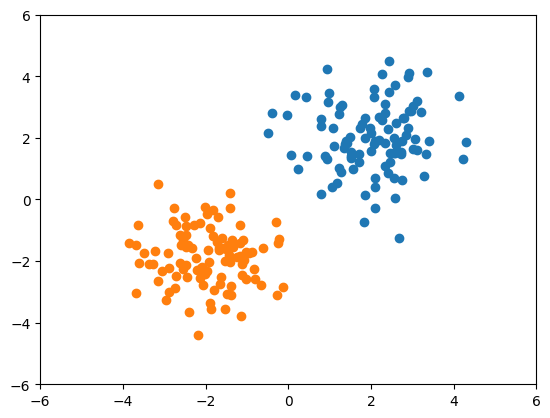


   Epoch: 1
     RMS: 0.02688
Accuracy: 0.97312

   Epoch: 2
     RMS: 0.01654
Accuracy: 0.98346

   Epoch: 3
     RMS: 0.01244
Accuracy: 0.98756

   Epoch: 4
     RMS: 0.01015
Accuracy: 0.98985

   Epoch: 5
     RMS: 0.00867
Accuracy: 0.99133

   Epoch: 6
     RMS: 0.00762
Accuracy: 0.99238

   Epoch: 7
     RMS: 0.00683
Accuracy: 0.99317

   Epoch: 8
     RMS: 0.00621
Accuracy: 0.99379

   Epoch: 9
     RMS: 0.00570
Accuracy: 0.99430

   Epoch: 10
     RMS: 0.00529
Accuracy: 0.99471


In [14]:
# example data from two classes; 2D normal distributions
num = 100
x0 = np.random.multivariate_normal([2,2], np.array([[1,0],[0,1]]),num)
d0 = np.repeat(0, num)
x1 = np.random.multivariate_normal([-2,-2], np.array([[1,0],[0,1]]),num)
d1 = np.repeat(1, num)

plt.xlim(-6,6)
plt.ylim(-6,6)
plt.plot(x0[:,0],x0[:,1],'o')
plt.plot(x1[:,0],x1[:,1],'o')

plt.show()

X = np.vstack((x0,x1))
d = np.hstack((d0,d1))
d.shape = (200,1) # convierte el vector en un array

p = Perceptron(2,1)

p.train(X, d, 0.05, 10, 1)


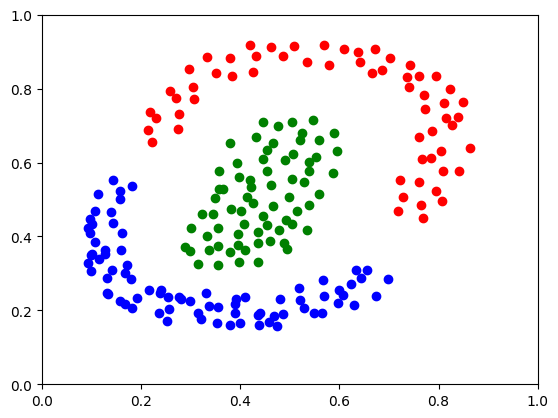

TRAINING

   Epoch: 100
     RMS: 0.29516
Accuracy: 0.77381

   Epoch: 200
     RMS: 0.20453
Accuracy: 0.86905

   Epoch: 300
     RMS: 0.08335
Accuracy: 0.98413

   Epoch: 400
     RMS: 0.06413
Accuracy: 0.99206

   Epoch: 500
     RMS: 0.05004
Accuracy: 0.99206

   Epoch: 600
     RMS: 0.04217
Accuracy: 0.99206

   Epoch: 700
     RMS: 0.03739
Accuracy: 0.99206

   Epoch: 800
     RMS: 0.03420
Accuracy: 0.99206

   Epoch: 900
     RMS: 0.03192
Accuracy: 0.99206

   Epoch: 1000
     RMS: 0.03021
Accuracy: 0.99206

-------- TESTING --------
  Test RMS: 0.30885
Test Acc.: 0.81746
------------------------



In [15]:
# regiones no lineales

X = np.loadtxt('samples/data_3classes_nonlinear_2D.txt')
d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
plt.show()

no = len(set(d))
ni = X.shape[1]

#! dividir el dataset  80-20
training_data = X[:int(len(X)*0.8)]
test_data = X[int(len(X)*0.8):]

d = one_hot(d.astype('int'))

training_classes = d[:int(len(d)*0.8)]
test_classes = d[int(len(d)*0.8):]


#!4 neuronas en capa oculta y un alpha del 0.4
P = Multilayer(ni,4,no) 

print("TRAINING")
P.train(training_data, training_classes, 0.4, 1000, 100)

#!TEST
P.test(test_data, test_classes)

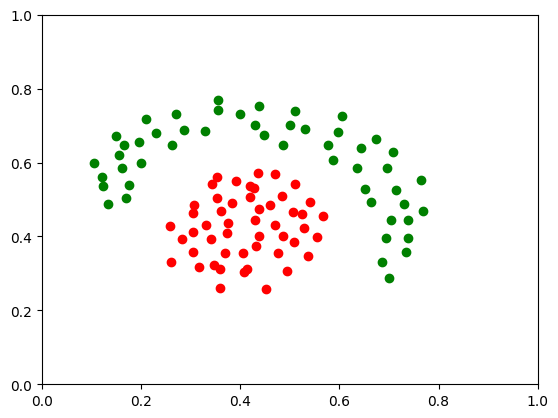

TRAINING

   Epoch: 100
     RMS: 0.40493
Accuracy: 0.62500

   Epoch: 200
     RMS: 0.30956
Accuracy: 0.71250

   Epoch: 300
     RMS: 0.29330
Accuracy: 0.75625

   Epoch: 400
     RMS: 0.25988
Accuracy: 0.77500

   Epoch: 500
     RMS: 0.10373
Accuracy: 0.97500

   Epoch: 600
     RMS: 0.06697
Accuracy: 1.00000

   Epoch: 700
     RMS: 0.05142
Accuracy: 1.00000

   Epoch: 800
     RMS: 0.04248
Accuracy: 1.00000

   Epoch: 900
     RMS: 0.03655
Accuracy: 1.00000

   Epoch: 1000
     RMS: 0.03229
Accuracy: 1.00000

-------- TESTING --------
  Test RMS: 0.03229
Test Acc.: 1.00000
------------------------



In [16]:
#? 2 clases
X = np.loadtxt('samples/data_2classes_nonlinear_2D.txt')
d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.show()

no = len(set(d))
ni = X.shape[1]


#! dividir el dataset  80-20
training_data = X[:int(len(X)*0.8)]
test_data = X[int(len(X)*0.8):]

d = one_hot(d.astype('int'))

training_classes = d[:int(len(d)*0.8)]
test_classes = d[int(len(d)*0.8):]

#! con 2 neuronas en capa oculta y alpha del 0.2
P = Multilayer(ni,3,no)

print("TRAINING")
P.train(training_data, training_classes, 0.2, 1000, 100)

#!TEST
P.test(training_data, training_classes)

In [17]:
# Orquideas

X = np.loadtxt('samples/iris.csv', dtype = 'float64', usecols = [0,1,2,3])
L = np.loadtxt('samples/iris.csv', dtype = str, usecols = [4]) 

# convierte la salida a enteros
d = []
options = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for e in L:
    d.append(options.index(e))

d = np.array(d)
X = np.array(X)

d = one_hot(d)

ni = X.shape[1]
no = len(options)

P = Multilayer(ni,15,no)

print("TRAINING")
P.train(X[:int(len(X)*0.8)], d[:int(len(d)*0.8)], 0.4, 1000, 100)

P.test(X[int(len(X)*0.8):], d[int(len(d)*0.8):])

TRAINING

   Epoch: 100
     RMS: 0.06229
Accuracy: 0.97222

   Epoch: 200
     RMS: 0.09018
Accuracy: 0.93889

   Epoch: 300
     RMS: 0.02075
Accuracy: 0.98889

   Epoch: 400
     RMS: 0.02151
Accuracy: 0.98889

   Epoch: 500
     RMS: 0.04881
Accuracy: 0.97222

   Epoch: 600
     RMS: 0.01949
Accuracy: 0.98889

   Epoch: 700
     RMS: 0.02747
Accuracy: 0.98611

   Epoch: 800
     RMS: 0.02638
Accuracy: 0.98889

   Epoch: 900
     RMS: 0.02537
Accuracy: 0.98889

   Epoch: 1000
     RMS: 0.02295
Accuracy: 0.99444

-------- TESTING --------
  Test RMS: 0.12383
Test Acc.: 0.93333
------------------------



In [18]:
#! APROBADOS
X_training_raw = np.loadtxt('samples/aprobado-ent.txt')
d_training = X_training_raw[:,-1].astype('int')
X_training = X_training_raw[:,:-1]

X_test_raw = np.loadtxt('samples/aprobado-tst.txt')
d_test = X_test_raw[:,-1].astype('int')
X_test = X_test_raw[:,:-1]

no = len(set(d_training))
ni = X_training.shape[1]

d_training_encoded = one_hot(d_training.astype('int'))
d_test_encoded = one_hot(d_test.astype('int'))

#! con 1 neurona en capa oculta y alpha del 0.2
P = Multilayer(ni,1,no)
print("TRAINING")
P.train(X_training, d_training_encoded, 0.3, 1000, 100)

#!TEST
P.test(X_test, d_test_encoded)

TRAINING

   Epoch: 100
     RMS: 0.40593
Accuracy: 0.67347

   Epoch: 200
     RMS: 0.40043
Accuracy: 0.67347

   Epoch: 300
     RMS: 0.38805
Accuracy: 0.67347

   Epoch: 400
     RMS: 0.38805
Accuracy: 0.67347

   Epoch: 500
     RMS: 0.24942
Accuracy: 0.79592

   Epoch: 600
     RMS: 0.29172
Accuracy: 0.71429

   Epoch: 700
     RMS: 0.16251
Accuracy: 0.87755

   Epoch: 800
     RMS: 0.08843
Accuracy: 0.95918

   Epoch: 900
     RMS: 0.06941
Accuracy: 0.97959

   Epoch: 1000
     RMS: 0.03471
Accuracy: 1.00000

-------- TESTING --------
  Test RMS: 0.04084
Test Acc.: 1.00000
------------------------



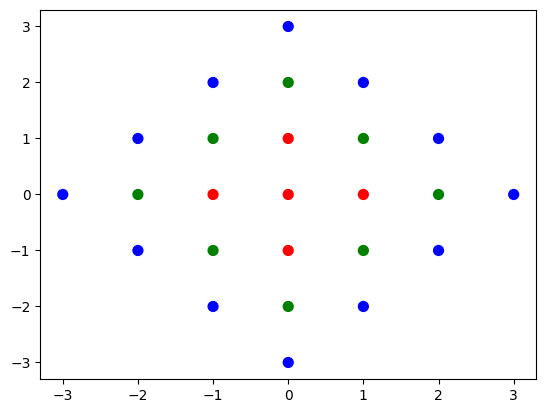

TRAINING

   Epoch: 100
     RMS: 0.40362
Accuracy: 0.76000

   Epoch: 200
     RMS: 0.30742
Accuracy: 0.86667

   Epoch: 300
     RMS: 0.26232
Accuracy: 0.93333

   Epoch: 400
     RMS: 0.21521
Accuracy: 0.92000

   Epoch: 500
     RMS: 0.19104
Accuracy: 0.92000

   Epoch: 600
     RMS: 0.17229
Accuracy: 0.94667

   Epoch: 700
     RMS: 0.14619
Accuracy: 0.97333

   Epoch: 800
     RMS: 0.11805
Accuracy: 1.00000

   Epoch: 900
     RMS: 0.09366
Accuracy: 1.00000

   Epoch: 1000
     RMS: 0.07583
Accuracy: 1.00000

   Epoch: 1100
     RMS: 0.06398
Accuracy: 1.00000

   Epoch: 1200
     RMS: 0.05592
Accuracy: 1.00000

   Epoch: 1300
     RMS: 0.05014
Accuracy: 1.00000


In [19]:
X = np.loadtxt('samples/circulo.txt')

x = X[:, 0]
y = X[:, 1]

labels = np.argmax(X[:, 2:], axis=1)
cmap = ListedColormap(['red', 'green', 'blue'])
plt.scatter(x, y, c=labels, cmap=cmap, s=50)
plt.show()


target_classes = X[:,2:].astype('int')
input_features = X[:,:2]

no = 3
ni = input_features.shape[1]

p = Multilayer(ni,10,no)
print("TRAINING")
p.train(input_features, target_classes, 0.5, 1300, 100)


TRAINING

   Epoch: 100
     RMS: 0.13820
Accuracy: 0.80950

   Epoch: 200
     RMS: 0.12478
Accuracy: 0.80950

   Epoch: 300
     RMS: 0.11932
Accuracy: 0.80950

   Epoch: 400
     RMS: 0.11592
Accuracy: 0.81170

   Epoch: 500
     RMS: 0.11363
Accuracy: 0.81170

   Epoch: 600
     RMS: 0.11294
Accuracy: 0.81170

   Epoch: 700
     RMS: 0.11280
Accuracy: 0.81170

   Epoch: 800
     RMS: 0.11291
Accuracy: 0.81170

   Epoch: 900
     RMS: 0.11300
Accuracy: 0.81170

   Epoch: 1000
     RMS: 0.11320
Accuracy: 0.81170

   Epoch: 1100
     RMS: 0.11338
Accuracy: 0.81170

   Epoch: 1200
     RMS: 0.11347
Accuracy: 0.81170

   Epoch: 1300
     RMS: 0.11352
Accuracy: 0.81170

   Epoch: 1400
     RMS: 0.11357
Accuracy: 0.81170

   Epoch: 1500
     RMS: 0.11359
Accuracy: 0.81170

   Epoch: 1600
     RMS: 0.11360
Accuracy: 0.81170

   Epoch: 1700
     RMS: 0.11360
Accuracy: 0.81170

   Epoch: 1800
     RMS: 0.11356
Accuracy: 0.81170

   Epoch: 1900
     RMS: 0.11347
Accuracy: 0.81170

   Epoch: 2

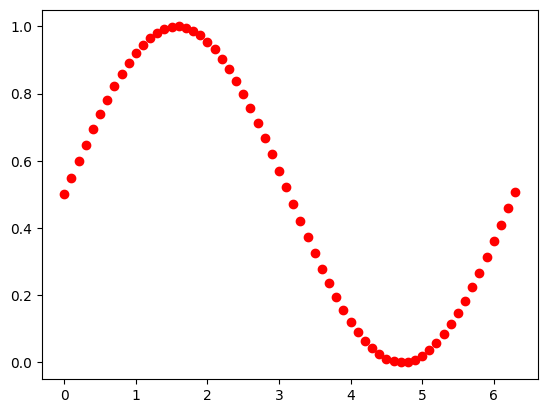

In [20]:
#!Func
training_data = np.loadtxt('samples/fun-trn.txt')
testing_data = np.loadtxt('samples/fun-tst.txt')

x_training = training_data[:,0]
y_training = training_data[:,1]

x_testing = testing_data[:,0]
y_testing = testing_data[:,1]

plt.scatter(x_training, y_training, c='red')

P = Multilayer(1, 10, 1)
print('TRAINING')
P.train(x_training.reshape(len(training_data),1), y_training.reshape(len(training_data),1), 0.2, 2000, 100)

P.test(x_testing.reshape(len(testing_data),1), y_testing.reshape(len(testing_data),1))

In [21]:
##Prueba con MLP

X = np.loadtxt('samples/data_2classes_nonlinear_2D.txt')
d = X[:,-1].astype('int')
X = X[:,:-1]

no = len(set(d))
ni = X.shape[1]


#! dividir el dataset  80-20
training_data = X[:int(len(X)*0.8)]
test_data = X[int(len(X)*0.8):]

d = one_hot(d.astype('int'))

training_classes = d[:int(len(d)*0.8)]
test_classes = d[int(len(d)*0.8):]

P = MLP(
  ni,[10],no
)
P.train(X=training_data, D=training_classes, alpha=0.2, epochs=2000, trace = 100,batch_size=100)


   Epoch: 100
     RMS: 0.46950
Accuracy: 0.62500

   Epoch: 200
     RMS: 0.46884
Accuracy: 0.62500

   Epoch: 300
     RMS: 0.46875
Accuracy: 0.62500

   Epoch: 400
     RMS: 0.46869
Accuracy: 0.62500

   Epoch: 500
     RMS: 0.46863
Accuracy: 0.62500

   Epoch: 600
     RMS: 0.46856
Accuracy: 0.62500

   Epoch: 700
     RMS: 0.46850
Accuracy: 0.62500

   Epoch: 800
     RMS: 0.46845
Accuracy: 0.62500

   Epoch: 900
     RMS: 0.46842
Accuracy: 0.62500

   Epoch: 1000
     RMS: 0.46841
Accuracy: 0.62500

   Epoch: 1100
     RMS: 0.46843
Accuracy: 0.62500

   Epoch: 1200
     RMS: 0.46848
Accuracy: 0.62500

   Epoch: 1300
     RMS: 0.46857
Accuracy: 0.62500

   Epoch: 1400
     RMS: 0.46867
Accuracy: 0.62500

   Epoch: 1500
     RMS: 0.46879
Accuracy: 0.62500

   Epoch: 1600
     RMS: 0.46892
Accuracy: 0.62500

   Epoch: 1700
     RMS: 0.46903
Accuracy: 0.62500

   Epoch: 1800
     RMS: 0.46914
Accuracy: 0.62500

   Epoch: 1900
     RMS: 0.46920
Accuracy: 0.62500

   Epoch: 2000
     

### Explicación de los archivos de datos suministrados

#### Aprobados

Contiene 3 entradas, correspondiente a la nota en 3 ejercicios, y 1 salida, que indica si el alumno aprobó o no. Se trataría de predecir si un alumno va a aprobar a partir de sus notas. Es un problema de clasificación.

Cuestiones: ¿Es un problema lineal? ¿Puede aprenderla una red de neuronas?

Respuestas:
1. Si es un problema lineal,En general, se puede decir que un problema es lineal si la separación entre los datos de diferentes clases se puede realizar mediante una línea recta o un hiperplano en el espacio de las features de entrada.Ademas podriamos tratar de entrenar un perceptron simple y evaluar su rendimiento para saber si el problema es lineal o no.Por ejemplo, si al entrenar al perceptron y realizar una pasada con datos de test, obtenemos una buena precision (que no sea del 100%) el problema podria aproximarse de manera lineal, aunque analiticamente no lo sea.

2. Si, una red de neuronas puede aprender a clasificar los datos en funcion de las notas. Dado que es un problema de clasificación binaria, se puede utilizar una red neuronal de una sola capa densa con una funcion de activacion sigmoide para predecir la salida
#### Fun

Contiene 1 entrada y 1 salida, que son la *x* y la *y* de una función desconocida. Es un problema de ajuste o regresión.

Cuestiones: ¿Es una funcon lineal? ¿Puede aprenderla una red de neuronas? ¿Puede decirnos la red qué función es?

Respuestas:
1. No es una funcion lineal, es una sinusoide.
2. Una red de neuronas puede aprenderla si se le proporciona una arquitectura adecuada y suficiente cantidad de datos, tal vez sea necesario aumentar el numero de capas ocultas para alcanzar un mejor indice de aciertos.
3. La red no puede decirnos que funcion es, pero nos brinda una aproximacion a la funcion original.
#### Morosos

Contiene datos de mnorosidad de un banco. La idea es predecir si un nuevo cliente va a devolver un prestamo o no y utilizar esta predicción para concederle o denegarle el préstamo. Es un problema de clasificación.

Tiene 9 entradas y 1 salida.

Cuestiones: ¿Es una función lineal? ¿Cuál es el porcentaje de acierto estimado en test?

#### Quinielas

Contiene datos de quinielas deportivas. Tiene 60 entradas y 3 salidas (1, X, 2). Es un problema de clasificación.

Cuestiones: ¿Cuál es el porcentaje de acierto estimado en test?

#### Sensores

Contiene datos de sensores y velocidades medias en la M-40. La idea es ver si se puede predecir la velocidad media en un punto que no tiene sensor a partir de las lecturas de los sensores en otros puntos. Es un problema de ajuste o regresión.

Cuestiones: ¿Cuál es el porcentaje de acierto estimado en test?

#### Circulo

Es un problema de clasificación con 3 regiones concéntricas. No tiene conjunto de test, el objetivo es encontrar la red mínima que pueda clasificar correctamente todos los ejemplos.

#### Encoder

Es el problema clásico de utilizar una capa oculta para codificar patrones de 8 valores en una dimensión menor. El objetivo es entrenar un perceptrón 8-3-8 para que aprenda esta codificación en el 100% de los ejemplos.  Es un problema de clasificación.

#### Pima-diabetes

Contiene resultados de un conjunto de análisis y pruebas en personas que posteriormente desarrollaron o no diabetes. La idea es ver si se puede predecir si una persona va a desarrollar la enfermedad en el futuro.

En este caso hay que separar aleatoriamente un 30% de ejemplos para tener una conjunto de test. Nota: se sugiere usar la función shuffle.

Cuestiones: ¿Cuál es el porcentaje de acierto estimado en test?